<a href="https://colab.research.google.com/github/WilliamPoch/Assignments/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
from google.colab import drive

# Parameters
batch_size = 32
num_classes = 10
epochs = 50
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [0]:
# Load cifar-10 dataset then
# Split dataset into train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# One-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', 
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [0]:
#checkpoint
from keras.callbacks import ModelCheckpoint
filepath = F"/content/gdrive/My Drive/weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2,
    horizontal_flip=True)

In [0]:
datagen.fit(x_train)
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=8,
                    callbacks=callbacks_list,
                    use_multiprocessing=True)


Epoch 1/50
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6693 - acc: 0.7712 - val_loss: 0.6000 - val_acc: 0.7946
Epoch 2/50
   7/1563 [..............................] - ETA: 36s - loss: 0.7343 - acc: 0.7366

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1563/1563 [==============================] - 39s 25ms/step - loss: 0.6750 - acc: 0.7685 - val_loss: 0.6132 - val_acc: 0.7970
Epoch 3/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6727 - acc: 0.7715 - val_loss: 0.6171 - val_acc: 0.7911
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6701 - acc: 0.7698 - val_loss: 0.6637 - val_acc: 0.7829
Epoch 5/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6665 - acc: 0.7725 - val_loss: 0.5977 - val_acc: 0.8049
Epoch 6/50
1563/1563 [==============================] - 38s 25ms/step - loss: 0.6701 - acc: 0.7722 - val_loss: 0.6025 - val_acc: 0.7993
Epoch 7/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6637 - acc: 0.7723 - val_loss: 0.6056 - val_acc: 0.7986
Epoch 8/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6601 - acc: 0.7736 - val_loss: 0.6525 - val_acc: 0.7826
Epoch 9/50
1563/1563 [==============================] - 39s

In [0]:
# Save
model.save(F"/content/gdrive/My Drive/model.h5")
model.save_weights(F"/content/gdrive/My Drive/weights.h5")

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 164us/step
Test loss: 0.6237618696212769
Test accuracy: 0.7976


Prediction :  dog


<function matplotlib.pyplot.show>

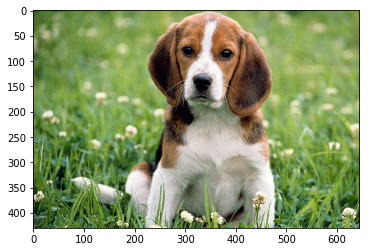

In [0]:
import cv2, numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model(F"/content/gdrive/My Drive/model.h5")

image_path = F"/content/gdrive/My Drive/Beagle.jpg"

original = image.load_img(image_path)
img = image.load_img(image_path, target_size=(32,32,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = model.predict(x)
pred = np.argmax(pred, axis=1)

def get_label(num):
  if (num == 0):
    return 'airplane'
  elif (num == 1):
    return 'automobile'
  elif (num == 2):
    return 'bird'
  elif (num == 3):
    return 'cat'
  elif (num == 4):
    return 'deer'
  elif (num == 5):
    return 'dog'
  elif (num == 6):
    return 'frog'
  elif (num == 7):
    return 'horse'
  elif (num == 8):
    return 'ship'
  else:
    return 'truck'
  
print('Prediction : ', get_label(pred))
plt.imshow(img)
plt.imshow(original)
plt.show



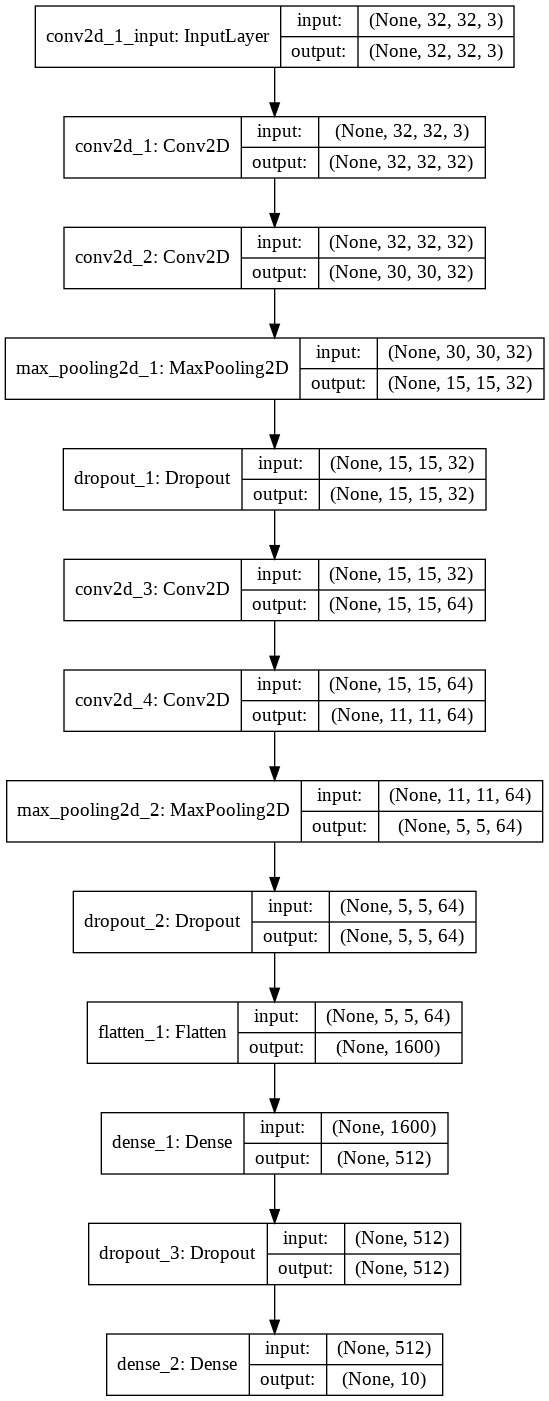

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)